# Modelado de series de tiempo con Prophet

Este notebook aplica el modelo Prophet de Facebook para predecir las exportaciones f√≠sicas de cobre chileno por tipo de producto. Adem√°s, se realiza una descomposici√≥n estacional de cada serie para entender mejor sus patrones.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


import sys
import os
# Agregar el directorio src al PATH
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from utils import analisis_estacional

plt.rcParams["figure.figsize"] = (12,6)

In [9]:
# Cargar datos limpios
df = pd.read_excel("../data/raw/02_07_2025__23_30_41.xls", skiprows=2)

df.rename(columns={
    'Periodo': 'Fecha',
    'Embarques Cobre Refinados (1)': 'Cobre_Refinado_TM',
    'Embarques Cobre Bl√≠ster (2)': 'Cobre_Blister_TM',
    'Embarques Cobre Graneles (3)': 'Cobre_Granel_TM',
    'Totales': 'Total_TM'
}, inplace=True)

month_translation = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Convertir meses y luego a datetime
df['Fecha'] = df['Fecha'].str.lower().replace(month_translation, regex=True)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y')

df = df[['Fecha', 'Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']]
df.head()

Fecha    Total_TM  Cobre_Refinado_TM  Cobre_Blister_TM  Cobre_Granel_TM
0 2003-01-01  470.299988         282.500000         18.900000       168.899994
1 2003-02-01  375.299988         187.000000         13.400000       174.899994
2 2003-03-01  342.700012         183.600006          8.500000       150.600006
3 2003-04-01  392.500000         230.300003         32.200001       130.000000
4 2003-05-01  374.199982         245.899994         20.799999       107.500000

## Descomposici√≥n estacional (con Statsmodels)

La descomposici√≥n estacional nos permite entender c√≥mo se compone la serie: tendencia, estacionalidad y ruido.

Vamos a aplicar `seasonal_decompose` a cada serie por separado, usando una frecuencia mensual.


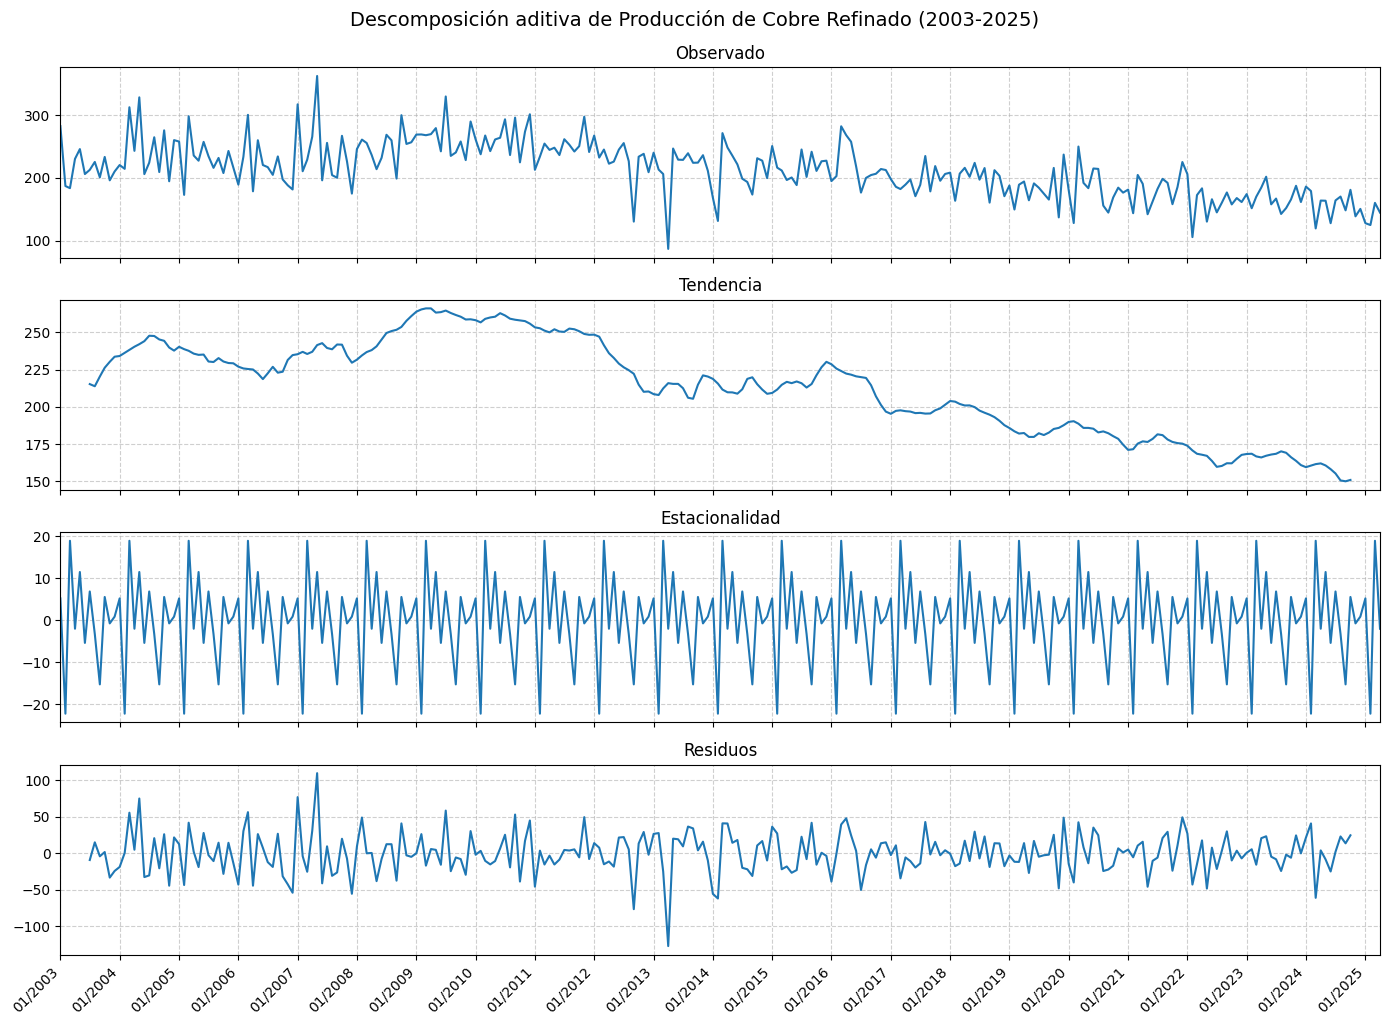

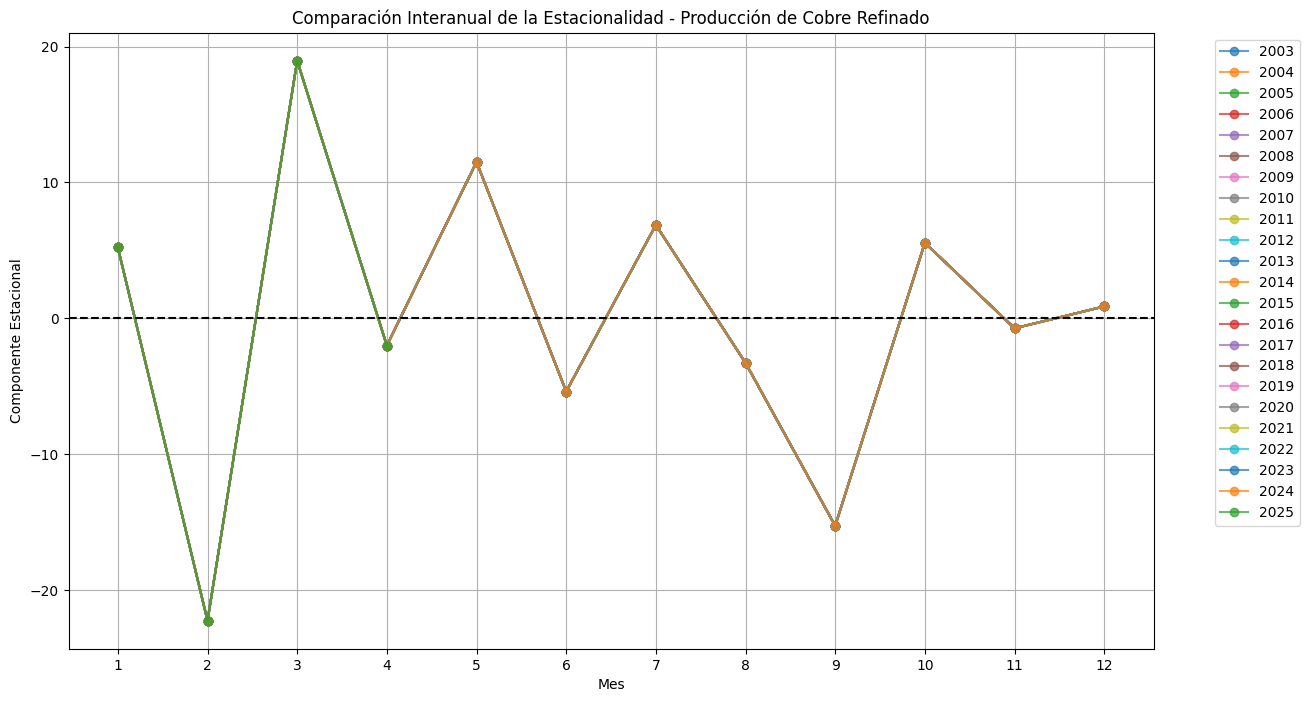

In [10]:
analisis_estacional(df, 'Cobre_Refinado_TM', 'Producci√≥n de Cobre Refinado')

### An√°lisis de la Producci√≥n de Cobre Refinado

#### 1. Tendencia
El an√°lisis de tendencia revela un comportamiento decreciente en la producci√≥n de cobre refinado, particularmente notable a partir de 2012. Esta reducci√≥n progresiva podr√≠a asociarse a:

- Cambios en los precios internacionales del cobre
- Agotamiento de yacimientos de mayor ley
- Factores regulatorios o econ√≥micos del periodo

#### 2. Estacionalidad
El componente estacional presenta patrones consistentes interanualmente, destacando:

**Meses de m√°xima producci√≥n:**
- Marzo (posible efecto de reactivaci√≥n post-vacaciones de verano)
- Mayo (preparaci√≥n para mitad de a√±o)
- Julio (segundo semestre operativo)

**Meses de m√≠nima producci√≥n:**
- Febrero (efecto temporada vacacional)
- Junio (cierre de semestre)
- Septiembre (efecto Fiestas Patrias en Chile)

Este patr√≥n recurrente sugiere que los factores operacionales y log√≠sticos mantienen una influencia constante a√±o tras a√±o.

#### 3. Residuos
El an√°lisis de residuos identifica dos eventos at√≠picos significativos:

1. **Outlier positivo (2007):**
   - Coincide con el s√∫per ciclo del cobre (2003-2008)
   - Posible correlaci√≥n con inversiones en capacidad productiva

2. **Outlier negativo (2013):**
   - Corresponde con el punto de inflexi√≥n en la tendencia
   - Relacionable con:
     - Ca√≠da sostenida en precios del commodity
     - Reformas tributarias en pa√≠ses productores
     - Cambios en la demanda china

Estos eventos residuales representan variaciones no explicadas por los componentes estacionales o tendenciales, requiriendo an√°lisis espec√≠ficos de coyuntura.

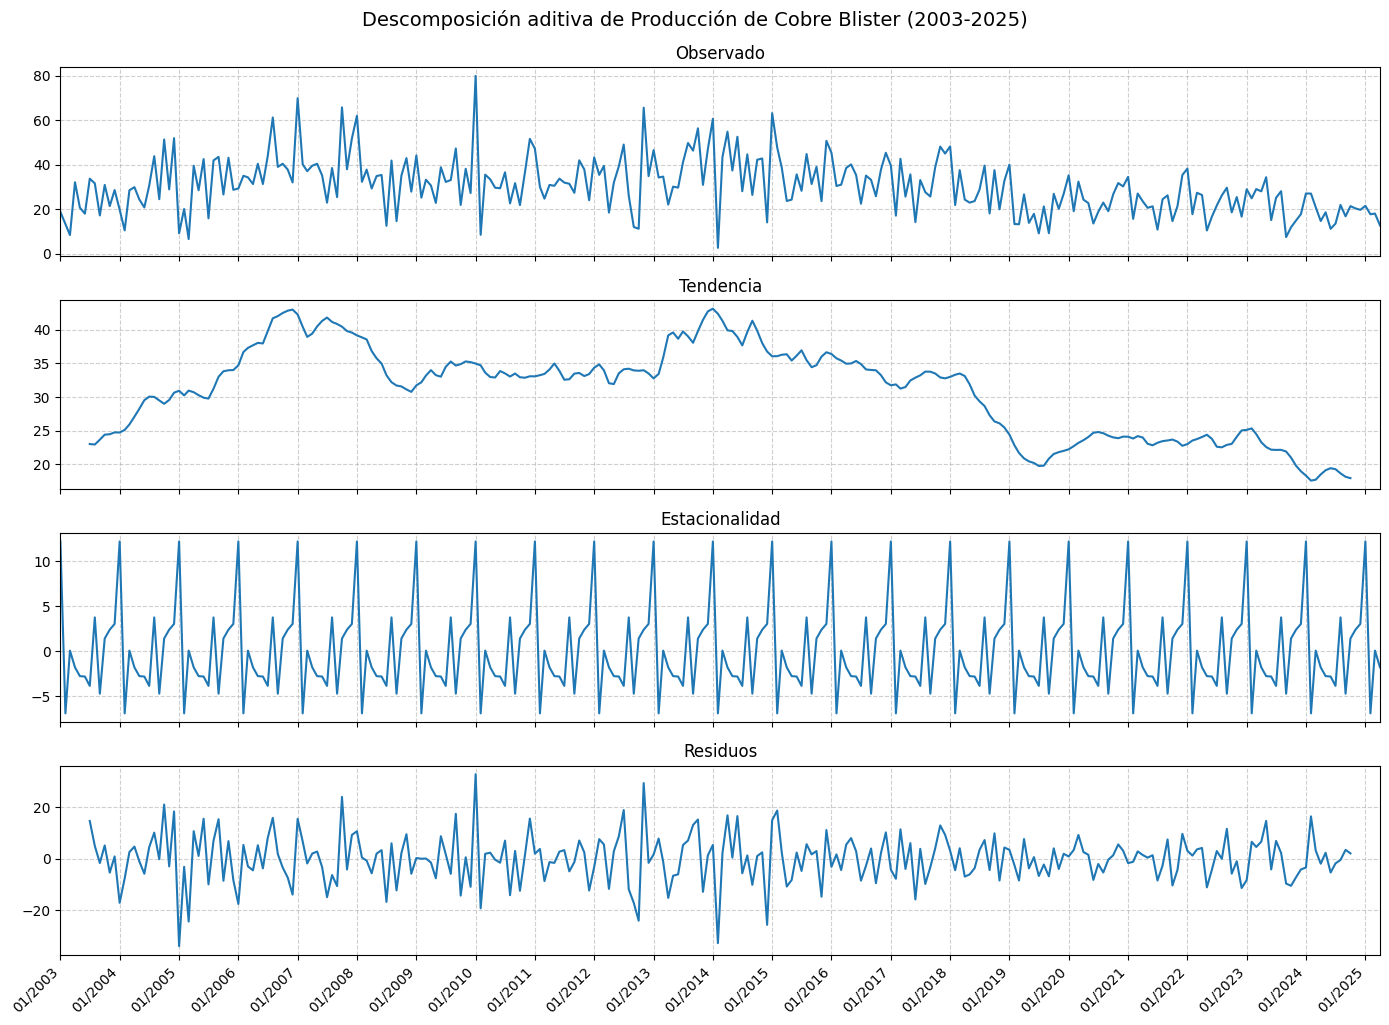

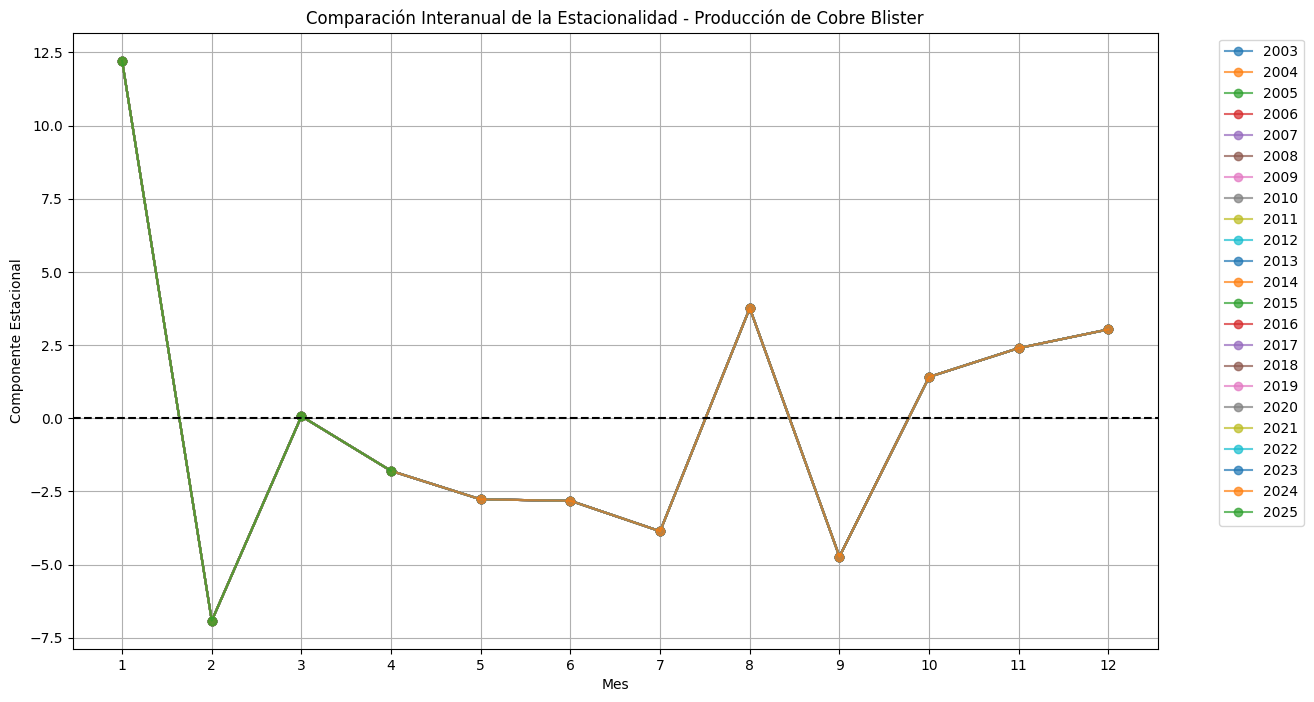

In [11]:
analisis_estacional(df, 'Cobre_Blister_TM', 'Producci√≥n de Cobre Blister')

### An√°lisis de la Producci√≥n de Cobre Blister

#### 1. Tendencia
El an√°lisis de la serie temporal revela:

- **Reducci√≥n progresiva** en la producci√≥n a partir de 2014
- **Posibles factores explicativos**:
  - Cambios en los procesos de fundici√≥n
  - Sustituci√≥n tecnol√≥gica hacia m√©todos m√°s eficientes
  - Disminuci√≥n en la disponibilidad de concentrados para procesamiento

#### 2. Estacionalidad
El componente estacional muestra patrones consistentes interanuales:

**Meses de m√°xima producci√≥n:**
- **Enero**: Posible efecto de acumulaci√≥n de inventarios a√±o anterior
- **Agosto**: Preparaci√≥n para aumento de demanda en segundo semestre

**Meses de m√≠nima producci√≥n:**
- **Febrero**: Impacto por temporada vacacional
- **Septiembre**: Efecto de paradas t√©cnicas programadas

Este comportamiento recurrente sugiere que los factores operacionales mantienen un patr√≥n estable en el mediano plazo.

#### 3. Residuos (Anomal√≠as)
Se identifican eventos at√≠picos significativos:

**Outliers positivos** (a√±os de producci√≥n excepcional):
1. 2010 (mayor magnitud) - Recuperaci√≥n post-crisis financiera
2. 2013 - Optimizaci√≥n de procesos metal√∫rgicos
3. 2008 - Boom de precios del cobre

**Outliers negativos** (a√±os de ca√≠da productiva):
1. 2014-2015 (per√≠odo cr√≠tico) - Coincide con:
   - Reformas ambientales en fundiciones
   - Ca√≠da sostenida de precios internacionales
2. 2005 - Problemas en suministro de concentrados

#### Interpretaci√≥n Integral
La combinaci√≥n de:
- Tendencia decreciente post-2014
- Estacionalidad marcada
- Eventos at√≠picos concentrados en per√≠odos de volatilidad de precios

Sugiere que la producci√≥n de cobre blister responde fuertemente a:
‚úì Factores tecnol√≥gicos
‚úì Coyuntura de precios
‚úì Regulaciones ambientales

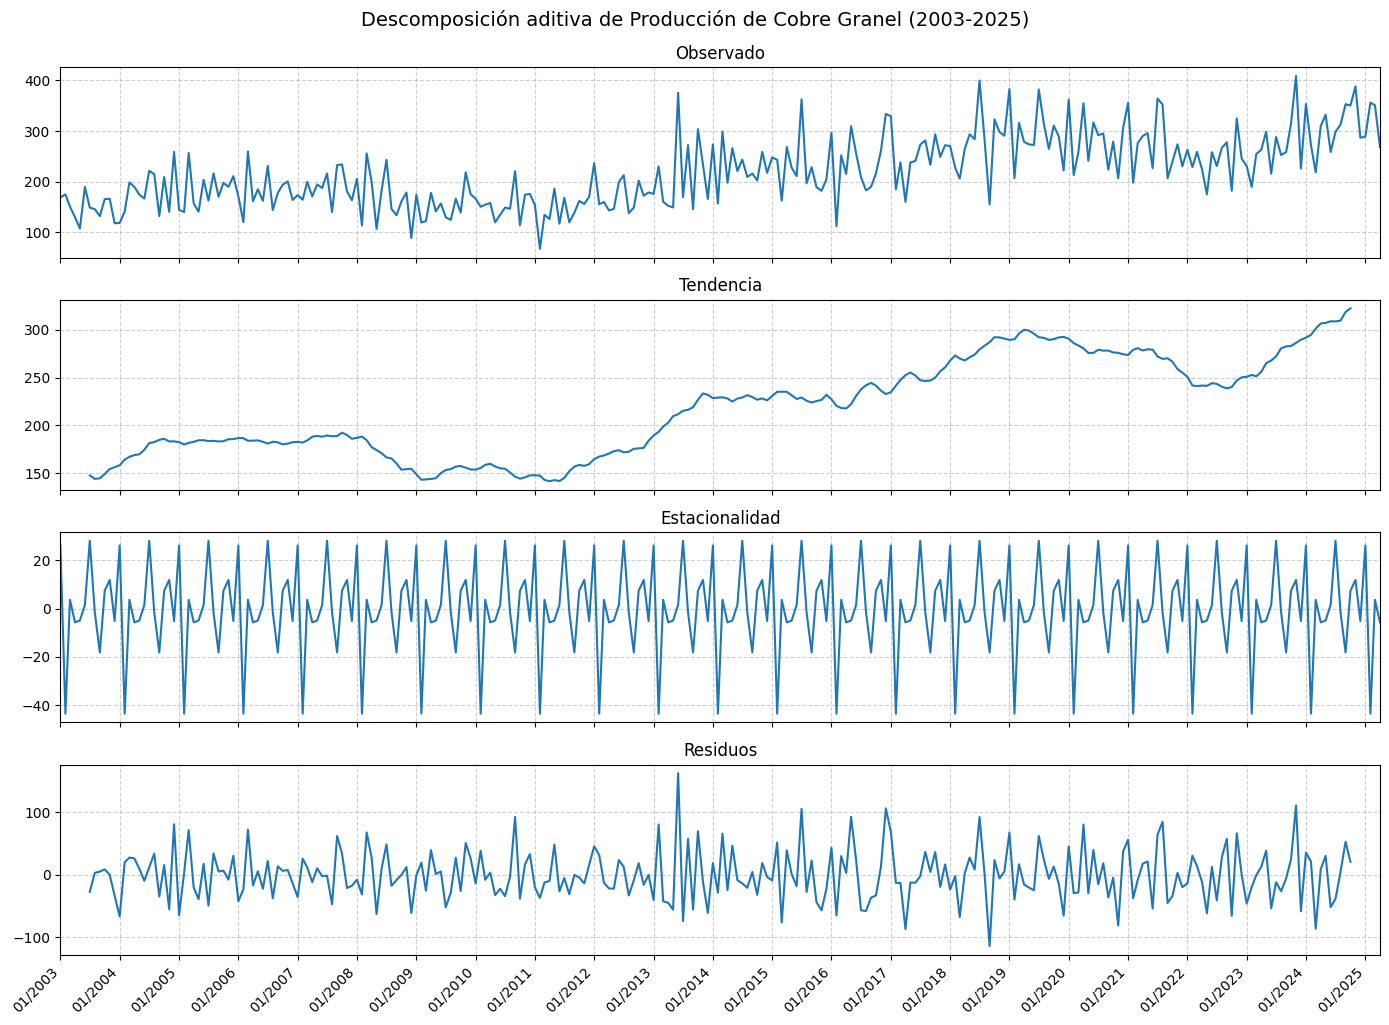

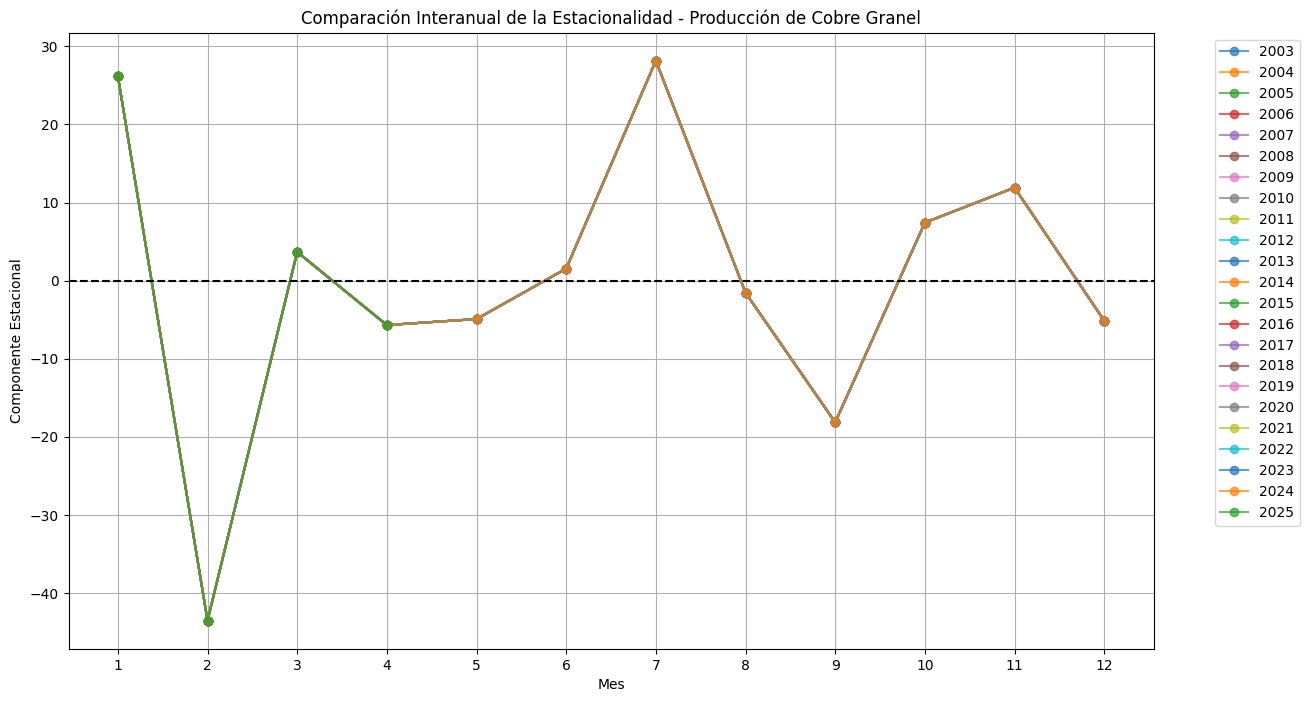

In [12]:
analisis_estacional(df, 'Cobre_Granel_TM', 'Producci√≥n de Cobre Granel')

### An√°lisis de la Producci√≥n de Cobre a Granel

#### 1. Tendencia
El an√°lisis de la serie temporal muestra:

- **Crecimiento sostenido** desde 2013
- **Posibles impulsores**:
  - Mayor demanda internacional de cobre a granel
  - Optimizaci√≥n de procesos log√≠sticos de exportaci√≥n
  - Expansi√≥n de capacidad en puertos especializados
  - Cambios en preferencias del mercado por este formato

#### 2. Estacionalidad
Patr√≥n estacional consistente interanual:

**Meses pico de producci√≥n:**
- **Enero**: Acumulaci√≥n post-cierre anual y preparaci√≥n para nuevo ciclo
- **Julio**: Ajustes de inventario para segundo semestre

**Meses de menor producci√≥n:**
- **Febrero**: Efecto temporada vacacional
- **Septiembre**: Impacto por celebraciones patrias en pa√≠ses productores

#### 3. Residuos (Eventos At√≠picos)
Anomal√≠as significativas detectadas:

**Outliers positivos** (a√±os de sobreproducci√≥n):
1. **2013**: Punto de inicio del crecimiento sostenido
2. **2015**: Posible correlaci√≥n con tratados comerciales
3. **2017**: Optimizaci√≥n de cadenas log√≠sticas
4. **2024**: Recuperaci√≥n post-pandemia acelerada

**Outlier negativo** (a√±o de ca√≠da abrupta):
- **2018**: 
  - Conflictos laborales en principales mineras
  - Cambios regulatorios en exportaciones
  - Eventos clim√°ticos extremos

#### Interpretaci√≥n Integral
La combinaci√≥n de:
‚úì Tendencia alcista constante
‚úì Estacionalidad predecible
‚úì Eventos at√≠picos asociables a coyunturas espec√≠ficas

Indica que este formato de comercializaci√≥n:
- Ha ganado participaci√≥n de mercado
- Responde a din√°micas log√≠sticas mejoradas
- Mantiene vulnerabilidad a eventos disruptivos

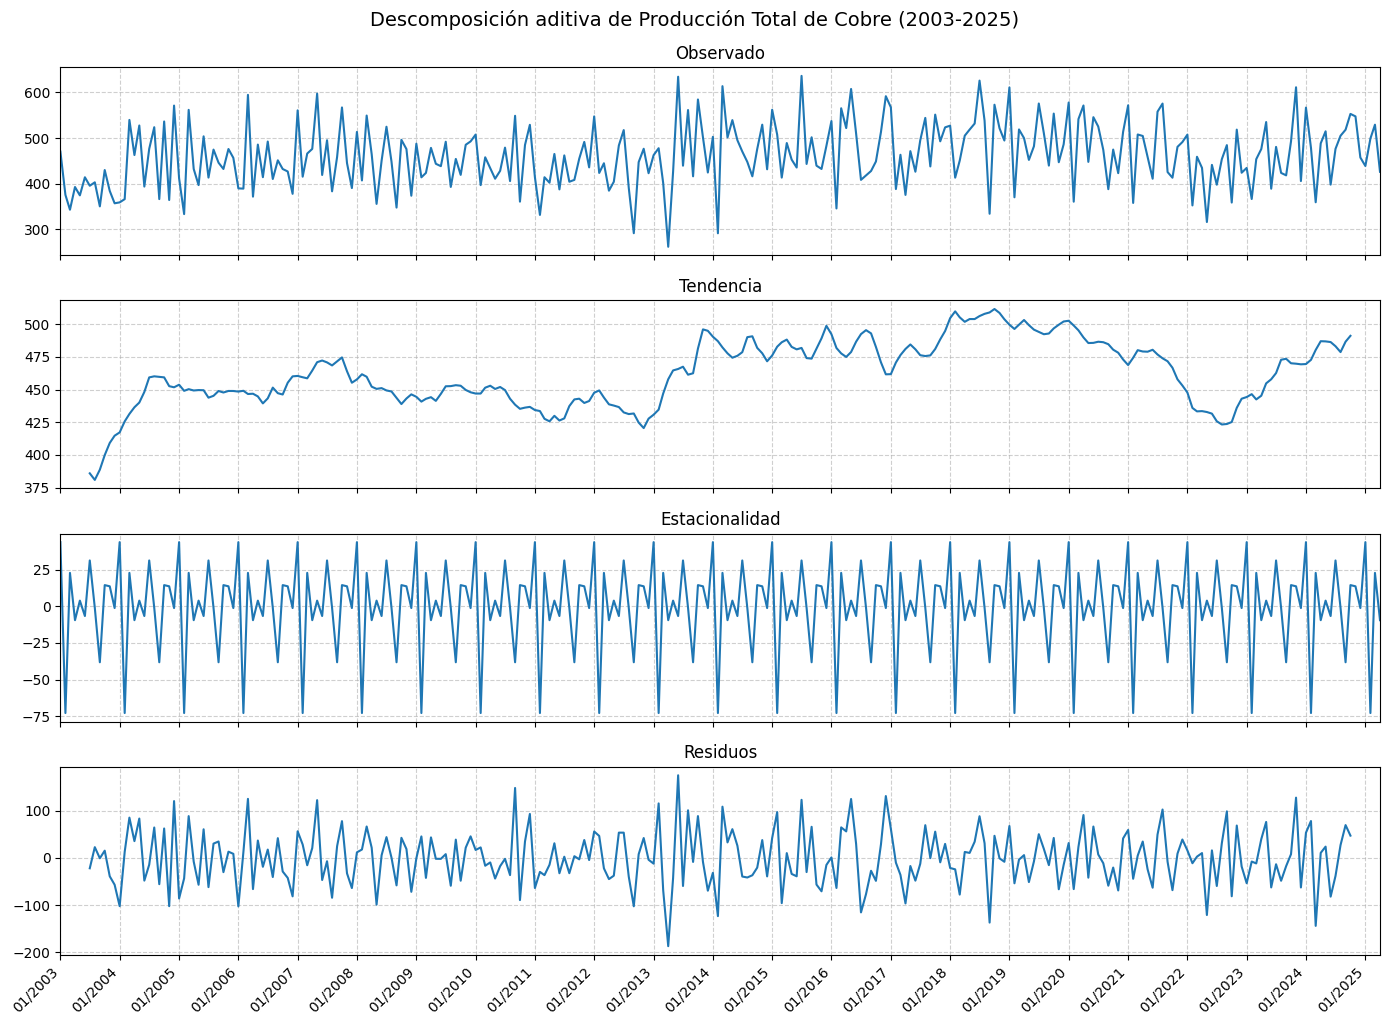

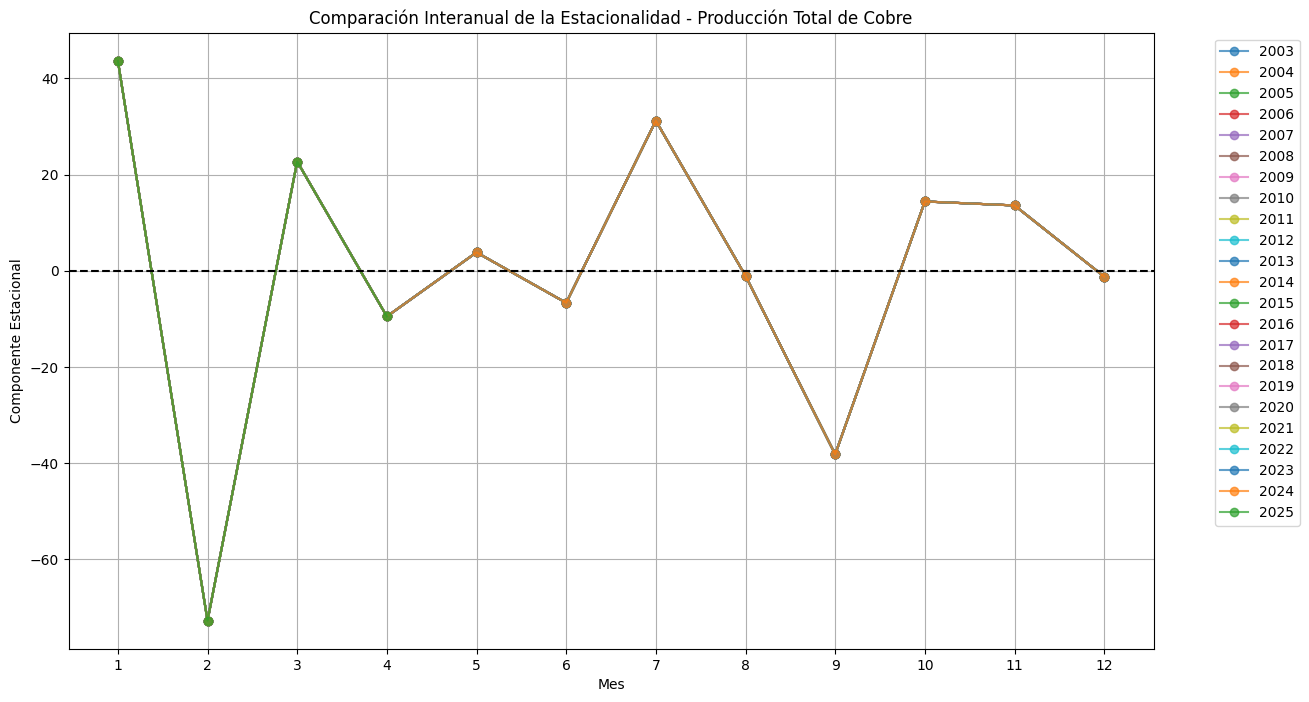

In [13]:
analisis_estacional(df,'Total_TM', 'Producci√≥n Total de Cobre')

### An√°lisis de la Producci√≥n Total de Cobre

#### 1. Tendencia
El an√°lisis revela un comportamiento general con caracter√≠sticas particulares:

- **Crecimiento sostenido** desde 2013 con dos interrupciones significativas:
  - **2022-2023**: Ca√≠da temporal atribuible a:
    - Impacto post-pandemia en cadenas de suministro
    - Ajustes en la demanda global
    - Restricciones energ√©ticas en principales pa√≠ses productores
  - **Recuperaci√≥n** en 2024, retomando la tendencia alcista

#### 2. Estacionalidad
Patr√≥n estacional consistente:

**Meses de m√°xima producci√≥n:**
- **Enero** (acumulaci√≥n estrat√©gica post-cierre anual)
- **Marzo** (reactivaci√≥n post-per√≠odo vacacional)
- **Julio** (preparaci√≥n para demanda del segundo semestre)

**Meses de m√≠nima producci√≥n:**
- **Febrero** (efecto temporada alta vacacional)
- **Septiembre** (impacto de mantenimientos programados)

#### 3. Residuos (Eventos At√≠picos)

**Outliers positivos notables:**
1. Mediados **2013** (inicio del ciclo alcista)
2. **2010** (recuperaci√≥n post-crisis financiera global)
3. Fin **2023** (reactivaci√≥n acelerada post-crisis)
4. **2006** (auge inicial del superciclo del cobre)

**Outliers negativos relevantes:**
1. Inicio **2013** (ajuste inicial del nuevo ciclo productivo)
2. Principio **2024** (impacto por retrasos en reinicio operacional)
3. Mediados **2018** (tensiones comerciales globales)

#### Interpretaci√≥n Integral
La producci√≥n total muestra:
‚úì Resiliencia ante shocks temporales (recuperaci√≥n post 2022-2023)
‚úì Patr√≥n estacional bien establecido
‚úì Sensibilidad a ciclos econ√≥micos globales

Factores clave:
- Capacidad de adaptaci√≥n a crisis temporales
- Dependencia de factores estacionales operacionales
- Vulnerabilidad a fluctuaciones de demanda internacional

## Preparaci√≥n de los conjutos de datos

Prophet requiere que cada serie tenga el formato:
- `ds`: fechas
- `y`: variable a modelar

Vamos a crear un DataFrame para cada serie con este formato.

In [14]:
series_names = ['Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']
prophet_data = {}

for name in series_names:
    temp_df = df[['Fecha', name]].rename(columns={'Fecha': 'ds', name: 'y'})
    temp_df.to_csv(f"../data/processed/{name}.csv", index=False)
    prophet_data[name] = temp_df

## üßæ Conclusiones del an√°lisis exploratorio y preparaci√≥n

A partir del an√°lisis de las exportaciones f√≠sicas de cobre por tipo de producto, se concluye lo siguiente:

### üîç Comportamiento por tipo de producto

- **Cobre Refinado**: Muestra una tendencia decreciente desde 2012, acompa√±ada de una estacionalidad bien definida. Esta evoluci√≥n puede reflejar cambios estructurales en la industria o decisiones de pol√≠tica productiva.
- **Cobre Bl√≠ster**: Se observa una ca√≠da post-2014, con estacionalidad moderada. Las fluctuaciones podr√≠an deberse a paradas t√©cnicas, ciclos de mantenimiento o regulaciones ambientales.
- **Cobre a Granel**: Es la serie con mayor crecimiento sostenido, y presenta una estacionalidad marcada. Esto sugiere una consolidaci√≥n de este formato de exportaci√≥n en el mercado internacional.
- **Producci√≥n Total**: Resume el comportamiento agregado de las dem√°s series, mostrando resiliencia en contextos adversos (por ejemplo, la pandemia), y un patr√≥n estacional regular.

### üîß Datos preparados para modelado

- Las cuatro series fueron convertidas al formato est√°ndar de predicci√≥n (`ds`, `y`) y almacenadas en la carpeta `data/processed/`.
- Se aplic√≥ descomposici√≥n estacional para identificar tendencias y ciclos relevantes, que ser√°n √∫tiles en la selecci√≥n y ajuste de modelos.

### ‚úÖ Pr√≥ximos pasos

En los siguientes notebooks se implementar√°n y comparar√°n **diversos modelos de predicci√≥n de series de tiempo**, incluyendo:

- **Prophet**, por su capacidad de capturar tendencias y estacionalidades autom√°ticamente.
- **ARIMA/SARIMA**, como enfoques estad√≠sticos cl√°sicos robustos y explicables.
- (Opcionalmente) **modelos m√°s complejos**, como XGBoost o LSTM, si la estructura y volumen de datos lo permiten.

Cada modelo ser√° evaluado en t√©rminos de su capacidad predictiva, interpretabilidad y ajuste a los datos hist√≥ricos. Esto permitir√° seleccionar la mejor estrategia para predecir las exportaciones de cobre por tipo de producto.

---
